In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import math

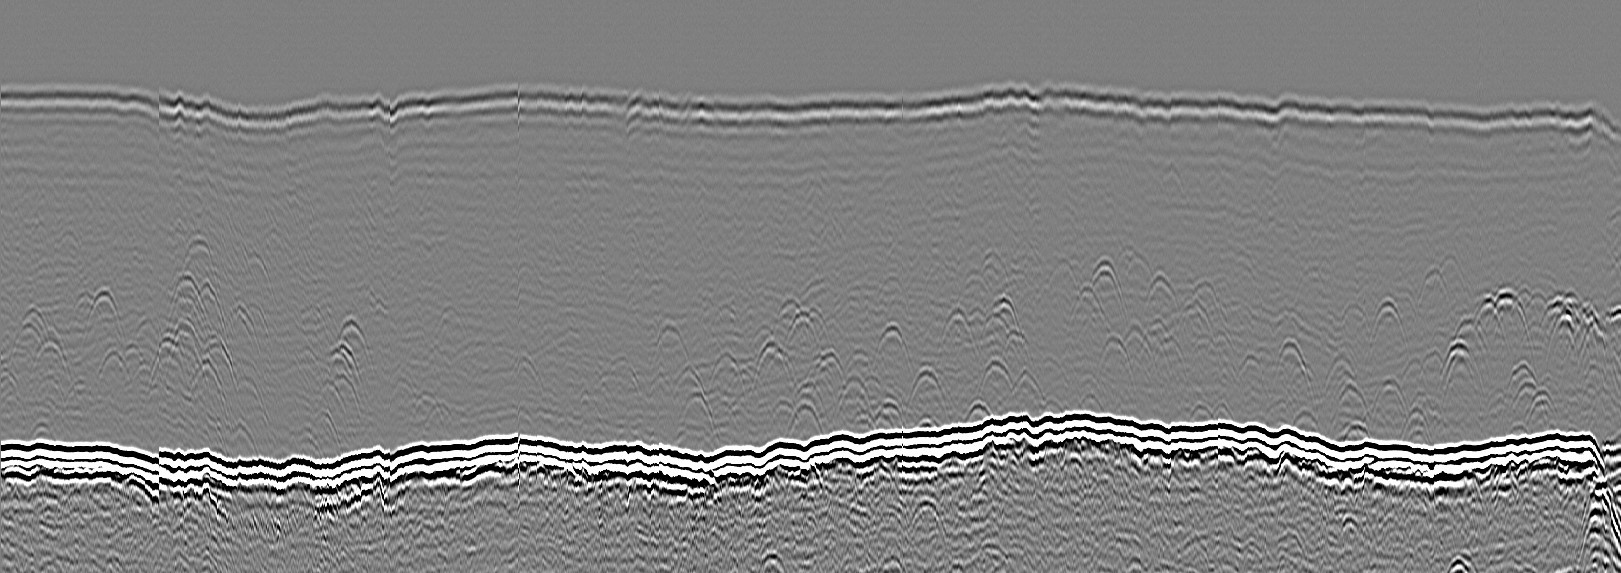

-1

In [134]:
# Read the original image
img = cv2.imread('/content/18[1].BMP')
# Display original image
cv2_imshow(img)
cv2.waitKey(0)

In [135]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

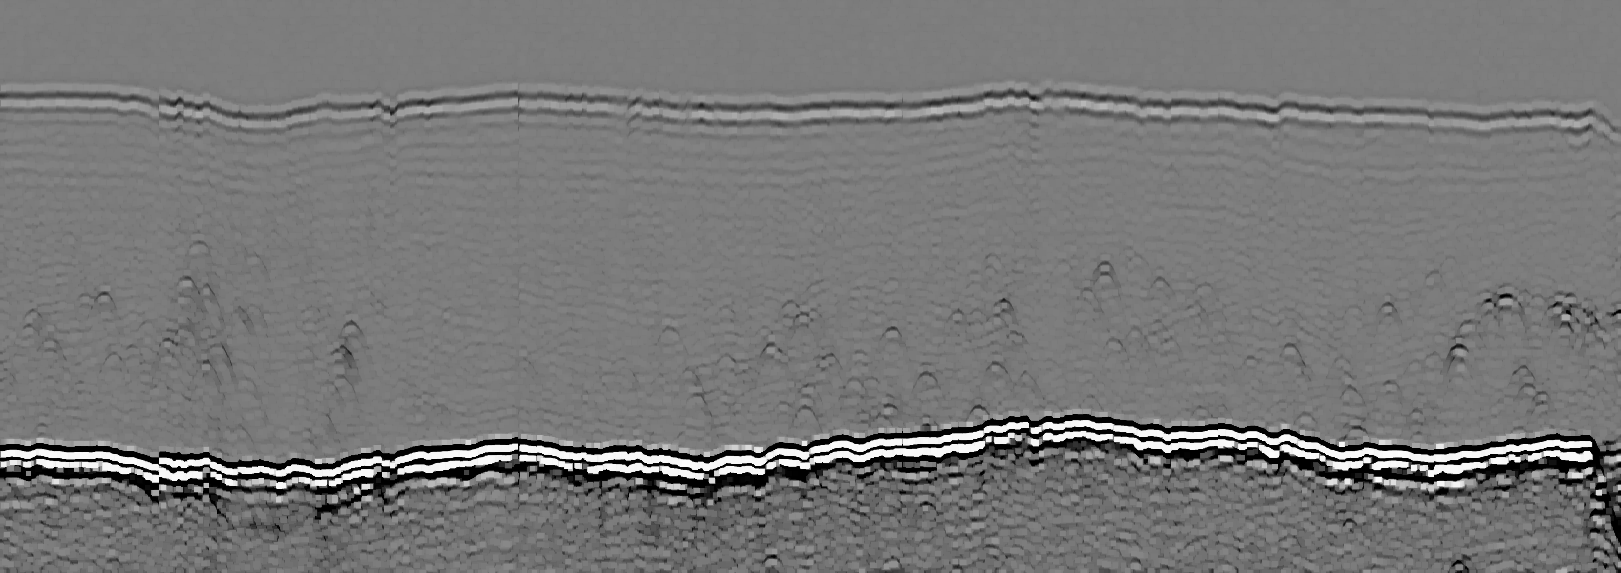

In [136]:
erosion = cv2.erode(img_gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
#cv2_imshow(img_gray)
#cv2_imshow(erosion)
cv2_imshow(opening)

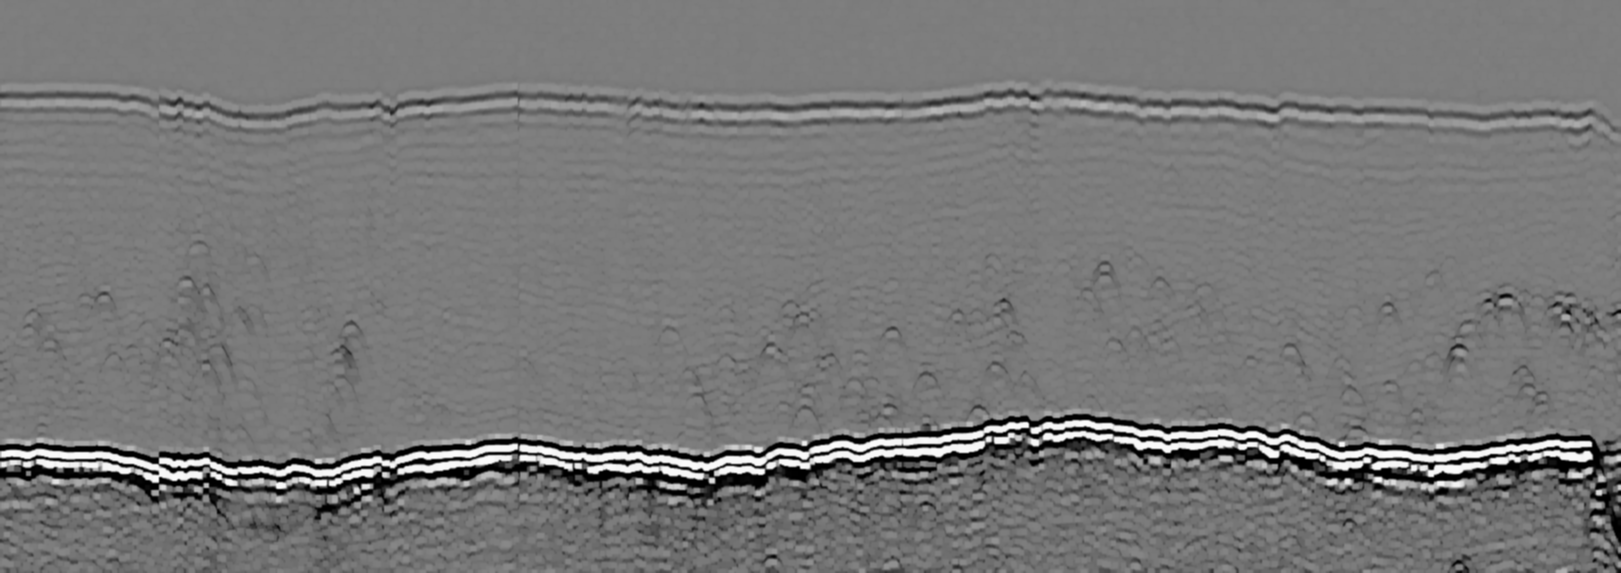

-1

In [137]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(opening, (3,3), 0)
cv2_imshow(img_blur)
cv2.waitKey(0)

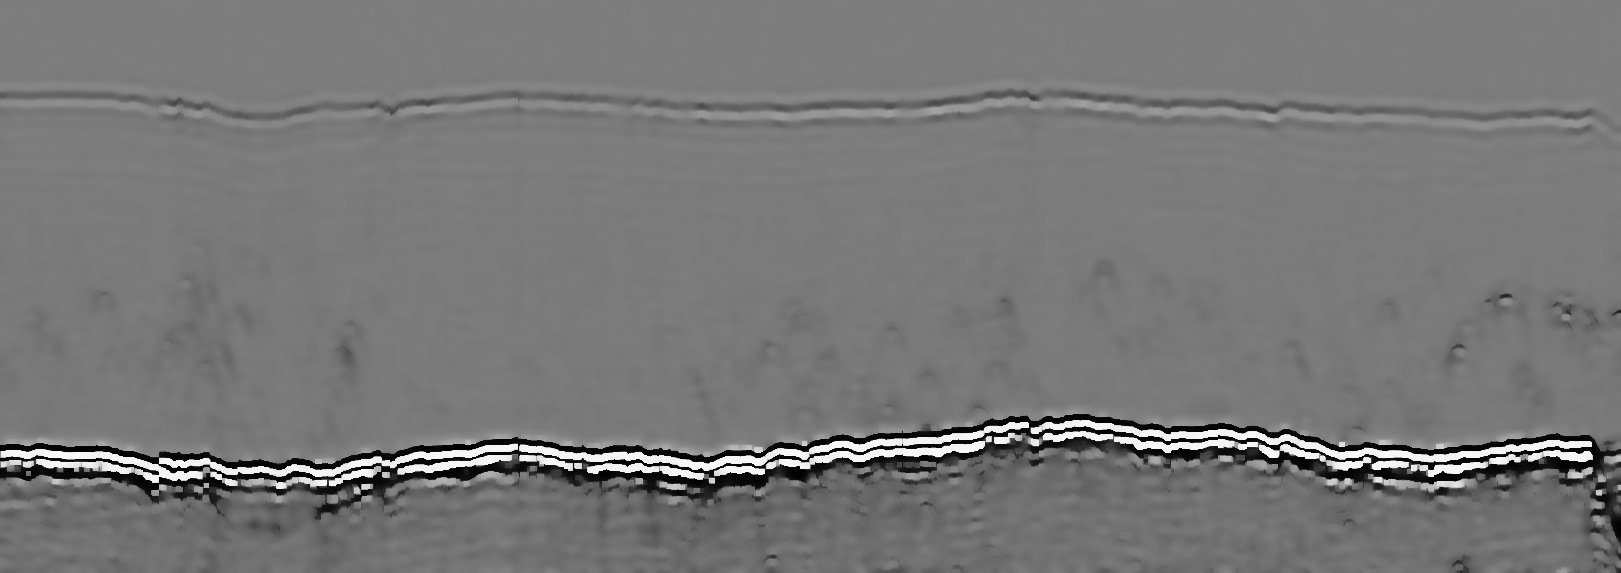

In [138]:
bilateral_filter = cv2.bilateralFilter(opening, 15, 55, 45)
cv2_imshow(bilateral_filter)

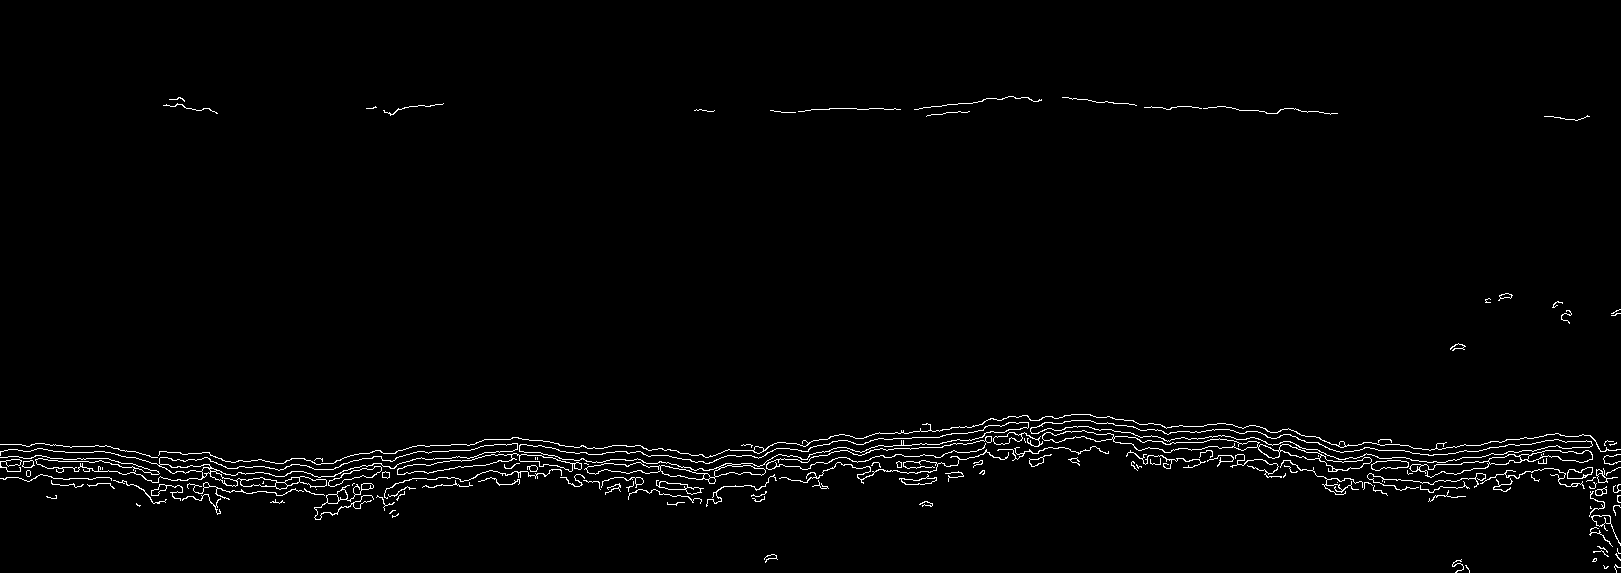

-1

In [139]:
# Canny Edge Detection
edges = cv2.Canny(image=bilateral_filter, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)
cv2.waitKey(0)

In [61]:
invert= 255 - edges

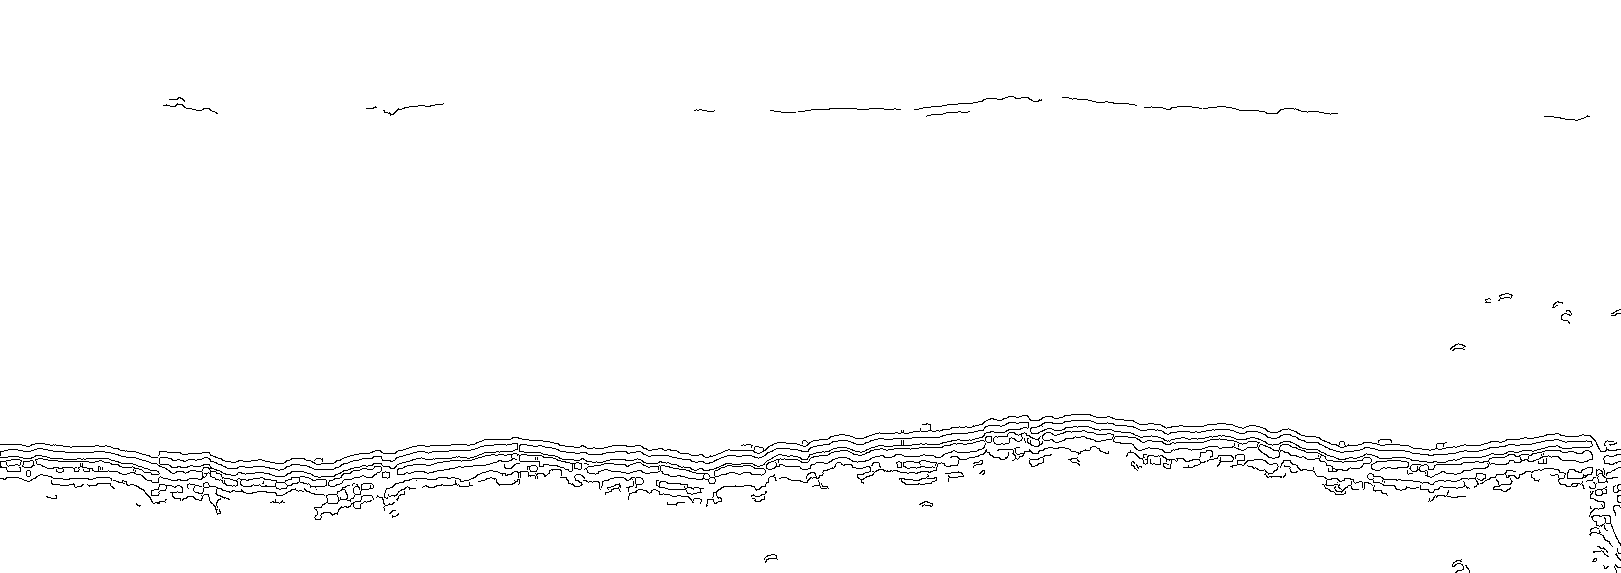

In [62]:
cv2_imshow(invert)

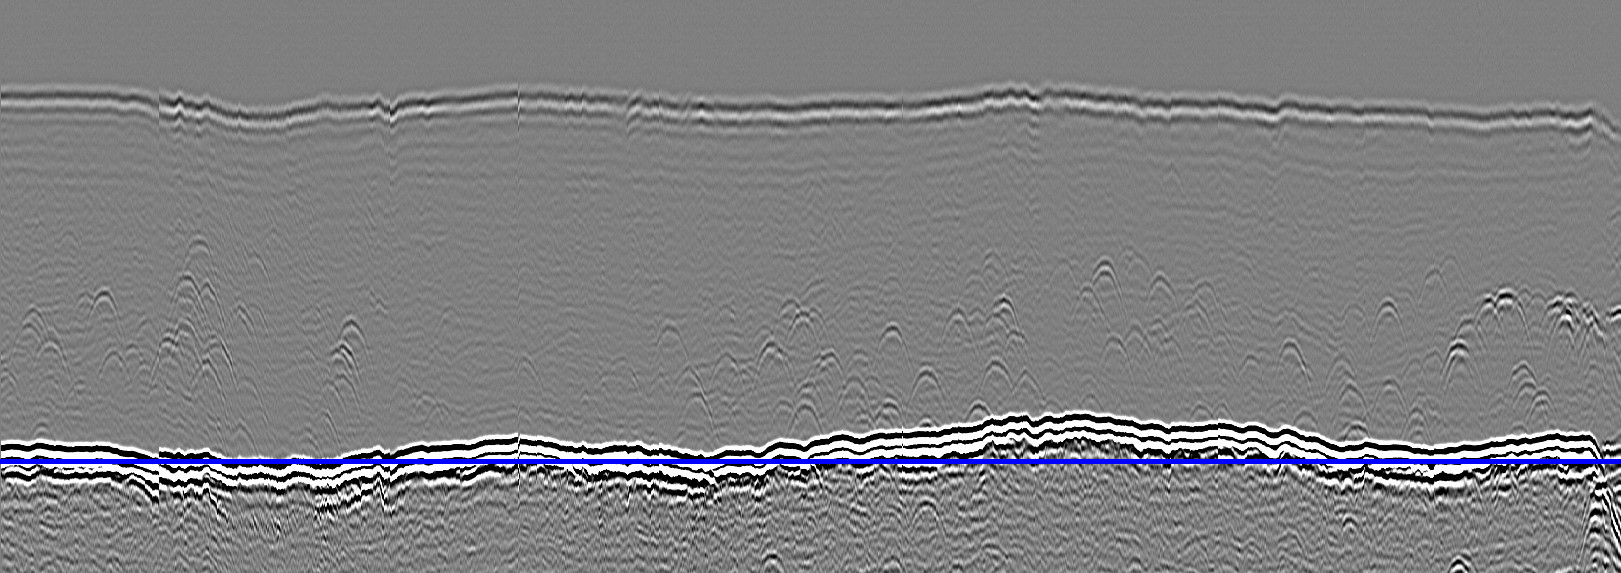

In [141]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 350, minLineLength=10, maxLineGap=150)
# Draw lines on the image
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 4)
#Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

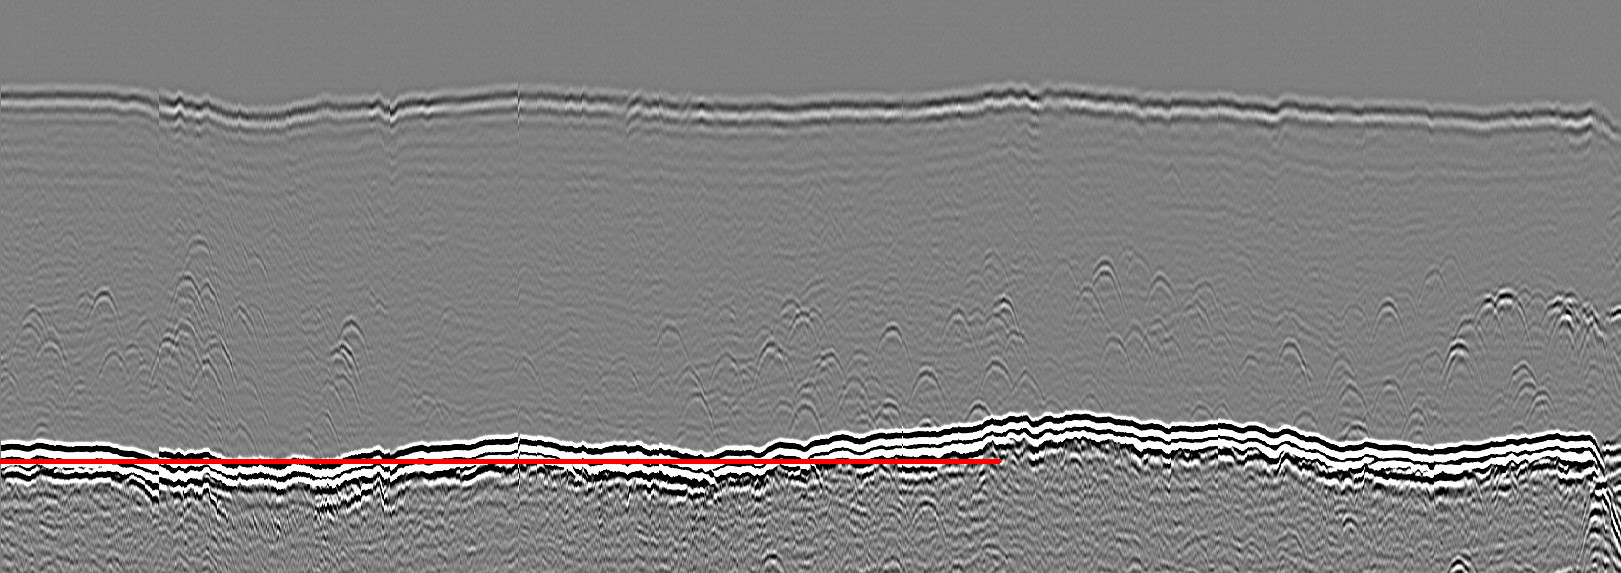

In [ ]:
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=350)

#Draw detected lines on the original image

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 4)

#Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()